# _K_-nearest neighbors (__KNN__)

## O que são?

Os modelos KNN são utilizados tanto para classificação quanto para regressão, eles são capazes de encontrar os _k_ dados com características mais semelhantes a um ponto _p_ e então definem o valor (classe ou valor da regressão) baseados nesse vizinho mais próximo.

_K_ é o número de vizinhos mais próximos ao ponto _p_, quanto maior o valor de _K_ mais suavizado é o processo, ou seja, mais vizinhos são levados em consideração e é feita uma média entre eles para decedir o valor de _p_. Quanto menor for _K_ maior a chance do ponto _p_ ser idêntico ao ponto mais próximo.

Quando uma variável com mais de uma dimensão é utilizada para treinar o modelo KNN é importante que ambas as dimensões estejam com os dados em escalas semelhantes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Exemplo classificação

In [3]:
#Gerando classes aleatórias
from sklearn.datasets.samples_generator import make_blobs 

X, y = make_blobs(n_samples=200, random_state = 6, centers=2, cluster_std=1)

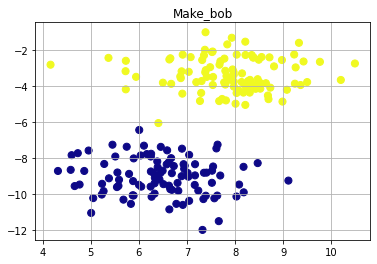

In [73]:
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='plasma_r');
plt.grid()
plt.title('Make_bob')
plt.show()

#Azul = 1, Amarelo = 0

In [85]:
from sklearn.neighbors import KNeighborsClassifier as KNC

KNN_clas = KNC(n_neighbors = 3)
KNN_fit = KNN_clas.fit(X, y)

#Novos pontos
p = np.array([[6, -2],[6, -10],[9, -6], [7.5, -6], [8.3, -7],[4, -4],[7, -6],[8.5, -6],[10, -7],[5, -5]])

KNN_pred = KNN_fit.predict(p)

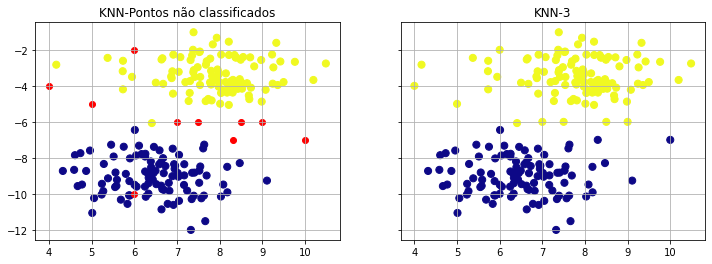

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='plasma_r')
ax[0].scatter(p[:, 0], p[:, 1], color='red');
ax[0].set_title('KNN-Pontos não classificados')
ax[0].grid()

ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='plasma_r')
ax[1].scatter(p[:, 0], p[:, 1], c=KNN_pred, s=50, cmap='plasma_r')
ax[1].set_title('KNN-3')
ax[1].grid()

Testando número de vizinhos

_O atributo WEIGHT define a forma de medir a distância entre os vizinhos, caso seja default ('uniform') todas as distâncias dos k vizinhos têm o mesmo peso, caso weight='distance' as distâncias recebem pesos, os mais próximos com mais peso_

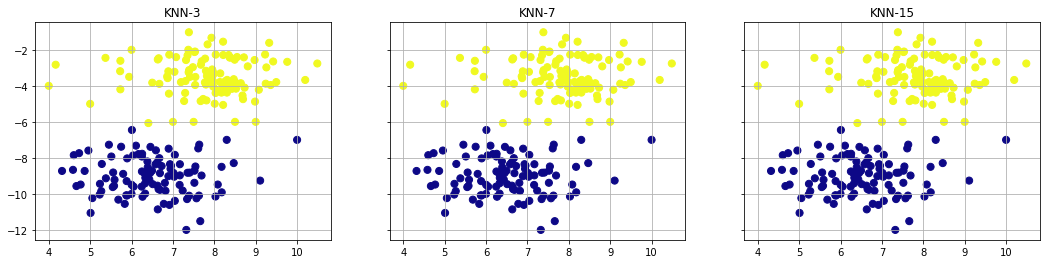

In [93]:
K = [3,7,15]

p = np.array([[6, -2],[6, -10],[9, -6], [7.5, -6], [8.3, -7],[4, -4],[7, -6],[8.5, -6],[10, -7],[5, -5]])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), sharey=True)
for ix, k in enumerate(K):
    
    KNN_clas = KNC(n_neighbors = k, weights='uniform')
    KNN_fit = KNN_clas.fit(X, y)
    KNN_pred = KNN_fit.predict(p)
    
    ax[ix].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='plasma_r')
    ax[ix].scatter(p[:, 0], p[:, 1], c=KNN_pred, s=50, cmap='plasma_r')
    ax[ix].set_title('KNN-{}'.format(k))
    ax[ix].grid()

### Exemplo regressão

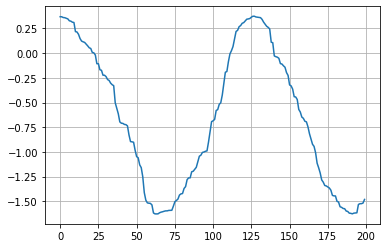

In [174]:
#Gerando regressão de treino
X_reg = np.sort(10 * np.random.rand(200))

Y_reg = np.cos(X_reg) + 3 * (0.5 - np.random.rand())

#Gerando regressão de teste
X_reg_test = np.sort(10 * np.random.rand(75))

Y_reg_test = np.cos(X_reg_test) + 3 * (0.5 - np.random.rand())

plt.plot(Y_reg)
#plt.xlim(0,20)
#plt.ylim()
plt.grid()

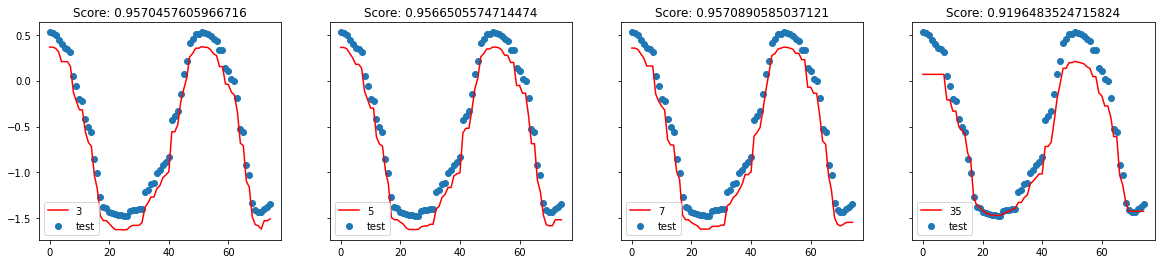

In [184]:
from sklearn.neighbors import KNeighborsRegressor as KNR

K = [3,5,7,35]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4), sharey=True)
for ix, k in enumerate(K):
    
    KNN_reg = KNR(n_neighbors = k, weights='uniform')
    KNN_fit = KNN_reg.fit(X_reg.reshape(-1,1), Y_reg)
    KNN_pred = KNN_fit.predict(X_reg_test.reshape(-1,1))
    
    ax[ix].plot(KNN_pred, color='red', label = K[ix])
    
    ax[ix].scatter(np.arange(len(X_reg_test)), Y_reg_test, label='test')
    
    ax[ix].legend()
    ax[ix].set_title('Score: {}'.format(KNN_fit.score(X_reg_test.reshape(-1,1), Y_reg_test)))

### Exemplo de série temporal

##### Prevendo ações do Facebook

In [327]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 6, 1)
start = dt.datetime(2019, 6, 1)

df = web.DataReader("FB", 'yahoo', start, end)
df.to_csv('FB.csv')

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

df.head()

,Close 0
0,164.149994
1,167.500000
2,168.169998
3,168.330002
4,173.350006


In [393]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,3)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2
2,168.169998,167.500000,164.149994
3,168.330002,168.169998,167.500000
4,173.350006,168.330002,168.169998
5,174.820007,173.350006,168.330002
6,178.100006,174.820007,173.350006


In [398]:
limit = int(len(new_df)*0.80)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

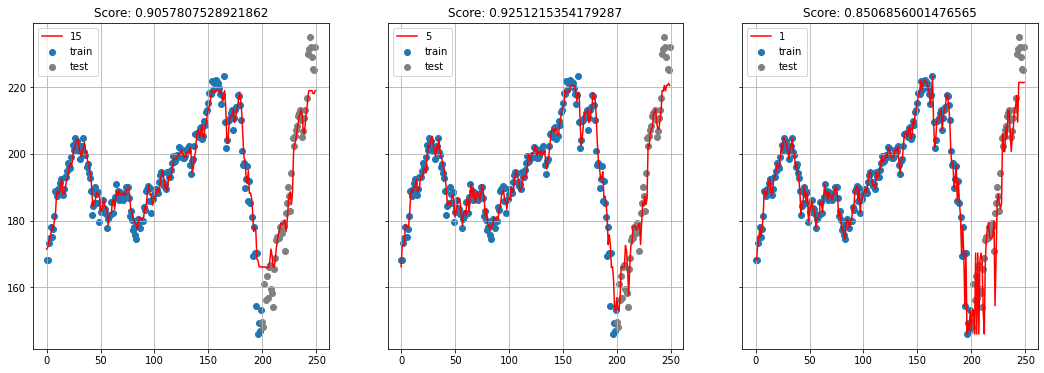

In [399]:
from sklearn.neighbors import KNeighborsRegressor as KNR

K = [15,5,1]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
for ix, k in enumerate(K):
    
    KNN_reg = KNR(n_neighbors = k, weights='uniform')
    KNN_fit = KNN_reg.fit(X_train, Y_train)
    KNN_pred = KNN_fit.predict(X)
    
    ax[ix].plot(KNN_pred, color='red', label = K[ix])
    
    ax[ix].scatter(np.arange(len(X))[:limit], Y_train, label='train')
    ax[ix].scatter(np.arange(len(X))[limit:], Y_test, color='grey', label='test')
    
    ax[ix].legend()
    ax[ix].set_title('Score: {}'.format(KNN_fit.score(X_test, Y_test)))
    ax[ix].grid()

### Conclusão

Os modelos KNN podem ser muito úteis em alguns problemas de classificação onde as classes são bem definidas, com poucos "outliers", contudo, não apresentou bons resultados na predição de séries temporais

#### Teste - utilizar previsão do dia seguinte para prever o próximo e assim sucessivamente

In [400]:
knn_teste = KNR(n_neighbors = 1)
knn = knn_teste.fit(X_train, Y_train)

def teste (model, t, df):
    results = []
    my_df = df.copy()
    for i in range (t):
        c1 = my_df.tail(1)['Target']
        c2 = my_df.tail(1)['Close 1']
        xt = pd.DataFrame([[c1, c2]])
        y = knn.predict(xt)
        df2 = pd.DataFrame({"Target":y, 
                            "Close 1":c1,
                            "Close 2":c2}) 
        my_df = my_df.append(df2, ignore_index = True)
    return my_df
        
df_res = teste(knn, len(df_test), df_train)

df_res

,Target,Close 1,Close 2
0,168.169998,167.500000,164.149994
1,168.330002,168.169998,167.500000
2,173.350006,168.330002,168.169998
3,174.820007,173.350006,168.330002
4,178.100006,174.820007,173.350006
...,...,...,...
245,153.130005,146.960007,153.130005
246,146.960007,153.130005,146.960007
247,153.130005,146.960007,153.130005
248,146.960007,153.130005,146.960007


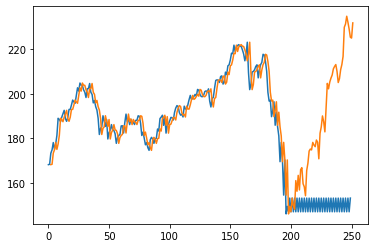

In [401]:
plt.plot(df_res['Target'])
plt.plot(new_df['Target'])
plt.show()